In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from microlocal_1d import *

## Simple propagation

--- Characteristic Variety (Char(P)) ---
Equation: Eq(xi, 0)

--- Bicharacteristic Flow (Propagation) ---


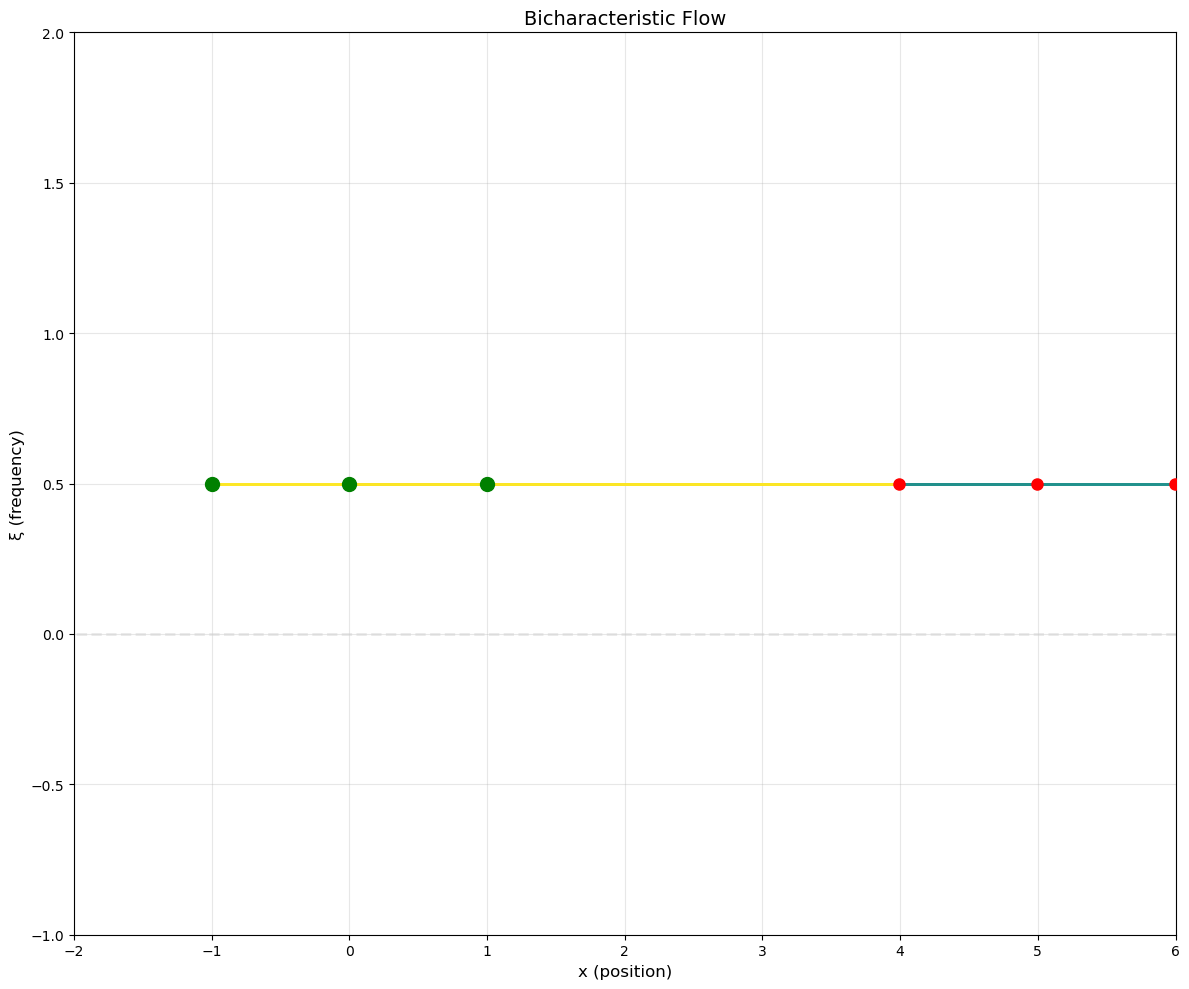

In [3]:
x, xi = symbols('x xi', real=True)
p_transport = xi  # Main symbol of P = (1/i) * d/dx
print("--- Characteristic Variety (Char(P)) ---")
char_transport = characteristic_variety(p_transport)
print(f"Equation: {char_transport['equation']}")
# Expected: xi = 0. Singularities can only exist with zero frequency.

print("\n--- Bicharacteristic Flow (Propagation) ---")
# Initial points on Char(P): (x₀, ξ₀) where ξ₀ ≈ 0
initial_points = [(0, 0.5), (1, 0.5), (-1, 0.5)]  # Use a small ξ for visualization
# Propagation over time t ∈ [0, 5]
tspan = (0, 5)
vis_range = ((-2, 6), (-1, 2))
# Visualization (uses the visualize_bicharacteristics function)
visualize_bicharacteristics(p_transport, initial_points, tspan, vis_range[0], vis_range[1])

## Oscillatory Propagation (Wave Operator)

--- Characteristic Variety (Char(P)) ---
Equation: Eq(-x**2 + xi**2 - 1, 0)

--- Bicharacteristic Flow (Wave in Potential) ---


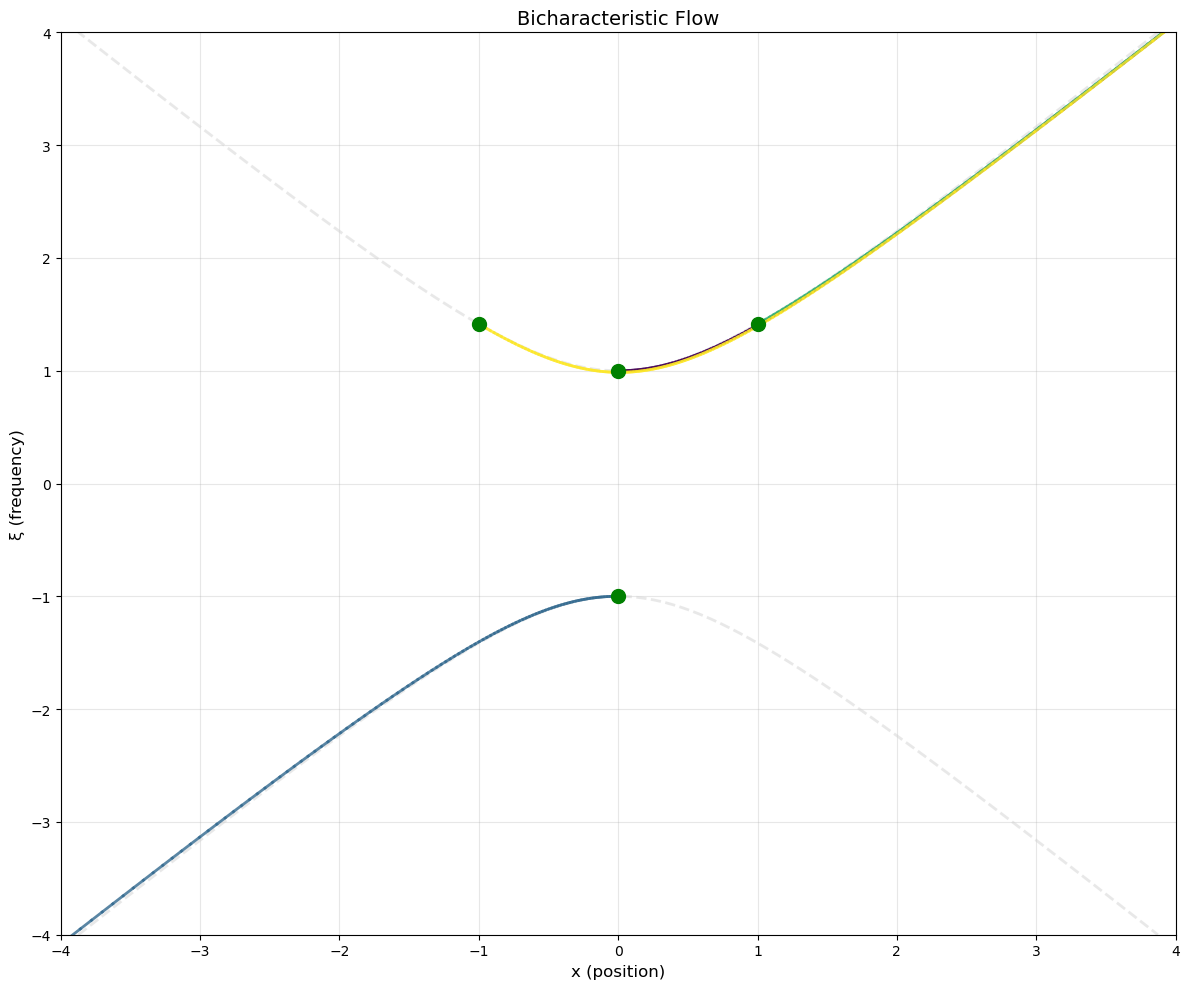

In [5]:
## Example 2: Oscillatory Propagation (Wave Operator)
x, xi = symbols('x xi', real=True)
p_wave = xi**2 - (1 + x**2)  # Symbol for the dispersive/non-homogeneous medium
print("--- Characteristic Variety (Char(P)) ---")
char_wave = characteristic_variety(p_wave)
print(f"Equation: {char_wave['equation']}")

print("\n--- Bicharacteristic Flow (Wave in Potential) ---")
# Initial points on Char(P): ξ = ±sqrt(1+x²)
initial_points_wave = [(0, 1), (0, -1), (1, np.sqrt(2)), (-1, np.sqrt(2))]
# Propagation over time t ∈ [0, 10]
tspan_wave = (0, 10)
vis_range_wave = ((-4, 4), (-4, 4))
# Visualization (uses the visualize_bicharacteristics function)
visualize_bicharacteristics(p_wave, initial_points_wave, tspan_wave, vis_range_wave[0], vis_range_wave[1])


## WKB Approximation and Caustics (Airy Equation)

--- Caustic Analysis ---
Caustic Indicator (∂²p/∂xi²): -2

--- WKB Approximation ---
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 = -0.1602988347118D+00   r2 = -0.1252250419728D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 = -0.1602988347118D+00   r2 = -0.1252250419728D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 = -0.1602988347118D+00   r2 = -0.1252250419728D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 = 

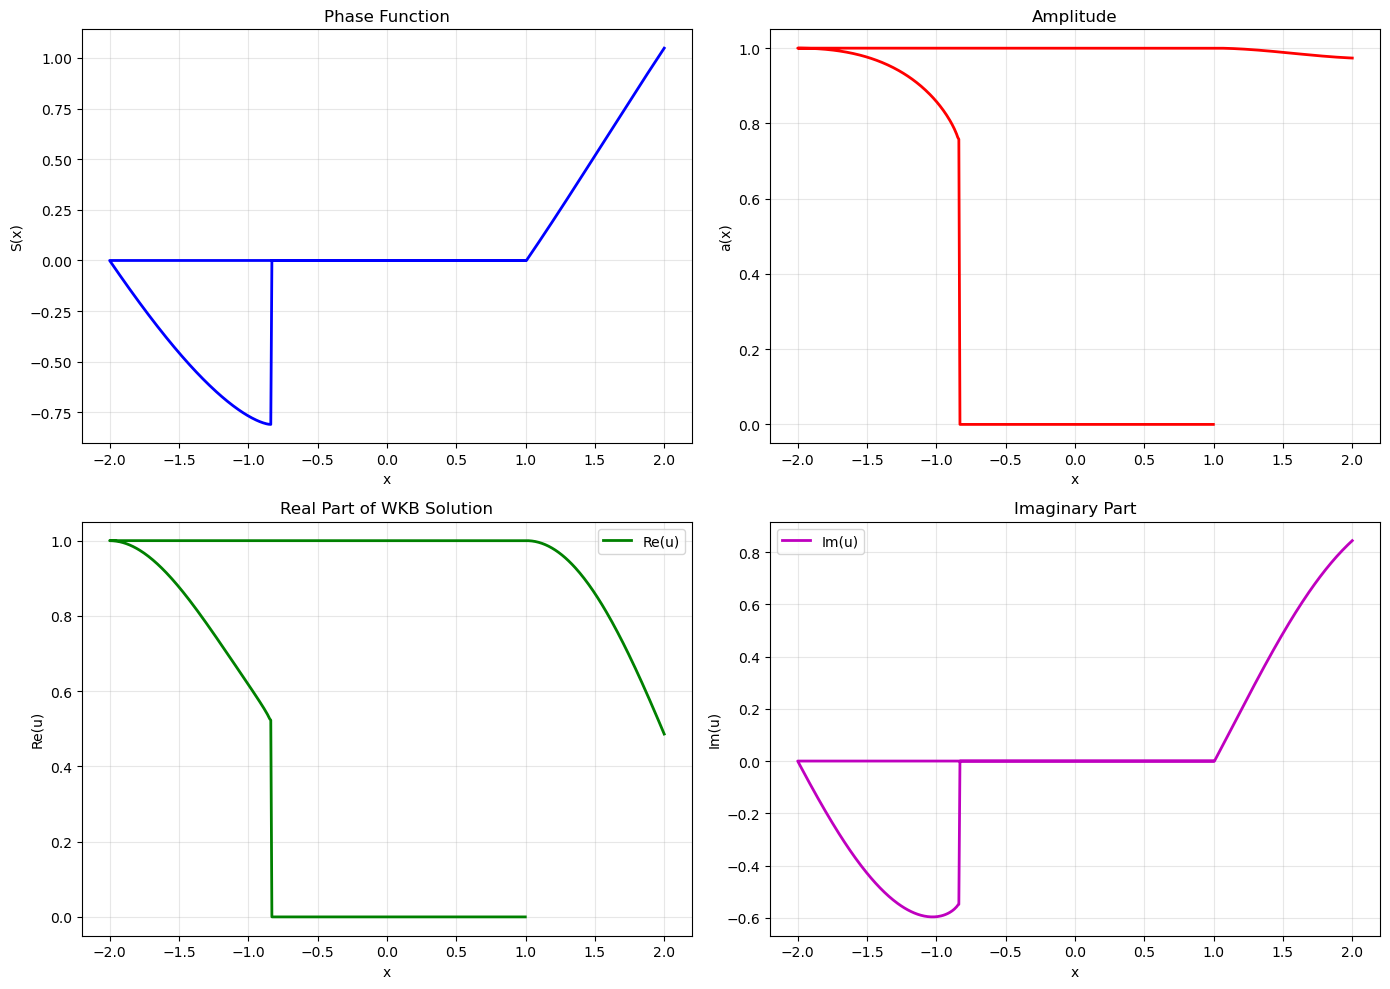


Finished WKB computation and visualization.


In [8]:
x, xi = symbols('x xi', real=True)
p_airy = -xi**2 + x  # Symbol for Airy P = (1/i * d/dx)² + x

# Calculate the second derivative for printing
d2p_dxi2_expr = diff(p_airy, xi, 2)
print("--- Caustic Analysis ---")
print(f"Caustic Indicator (∂²p/∂xi²): {d2p_dxi2_expr}")

print("\n--- WKB Approximation ---")
# IC: Initial point to the right of the caustic (x > 0)
x0_wkb = 1
# From the eikonal p(x, S')=0, we have -S'² + x = 0. S' = ±sqrt(x).
S0 = 0
Sp0 = np.sqrt(x0_wkb)  # We take the positive branch for a wave moving to the left
ic_airy = {'x0': x0_wkb, 'S0': S0, 'Sp0': Sp0}

wkb_airy = wkb_ansatz(p_airy, ic_airy, order=1, x_domain=(-2, 2), n_points=500)

# Visualization
visualize_wkb_solution(wkb_airy, plot_type='all')

print("\nFinished WKB computation and visualization.")
